<a name="cell-solving"></a>

3. [Line Search (and Direction Search)](#cell-opt-fx-linesearch)
    1. [Polynomial Approximation, Ternary (~~Bi~~Trisection) Search, and Backtracking](#cell-opt-fx-poly)
    2. [Golden Section Search](#cell-opt-fx-golden)
    3. [Goldstein-Armijo Sufficient Decrease, Curvature Conditions](#cell-opt-fx-Goldstein-Armijo)
    4. [Conjugate Gradient Methods](#cell-sovling-conjugate)
    

<a name="cell-opt-fx-linesearch"></a>
## 6.3 Line Search (and Direction Search) ([Return to TOC](#cell-solving)) 
---

$\quad\;\;\bullet\;\;$ ***Nonlinear Gauss-Seidel*** "optimally" updates one direction $x_j$ at a time $$\scriptsize\overset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \overbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}^{\text{if updating the $x_j$ direction}}$$
- Finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary direction $d^{(k)}$ the (also ***univariate***) ***line search problem*** where now $\quad\;\;\; \rho(\alpha^{(k)}) = f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$

- ***Successive overrelaxation*** provides a mechanism to stabilize and influence the direction $d^{(k)} = x^{(k+1)} - x^{(k)}$ 
but does not subsequently address the ***line search problem*** for  $d^{(k)}$ 

***Line search*** is a ***univariate*** (easier) subproblem of ***multivariate optimization***; but, for it to be useful 

$\quad\;\;\bullet\;\;$ $d^{(k)}$ must be a "good" direction; otherwise, computational resources spent<br>$\quad\quad\;\;$finding "optimal" $\alpha^{(k)}$ might be better spent towards finding a better $d^{(k)}$ <br>
$\quad\;\;\bullet\;\;$ A computational tradeoff and dimenishing returns naturally appear here


<a name="cell-opt-fx-poly"></a>
### 6.3.A Polynomial Approximation, Ternary (~~Bi~~Trisection) Search, and Backtracking ([Return to TOC](#cell-solving)) 
---

$$\underset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d_j^{(k)}\right) = \underbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}_{\text{if updating the $x_j$ direction}}$$

The ***line search*** problem is slightly more complicated version of ***univariate root finding***:<br> bracketing a root with ***bisection*** only requires $\rho(\alpha_1) < 0 < \rho(\alpha_2)$; but, bracketing a local minimum requires either<br>a three-point version of the ***bisection method*** known as [***Ternary Search***](https://en.wikipedia.org/wiki/Ternary_search) (or requires derivatives)

$$\rho(\alpha_3)<\rho(\alpha_1) \;\textit{ and } \rho \;(\alpha_3)<\rho(\alpha_2) \quad \;\text{ or }\; \quad \overset{\text{$\rho'$ are derivaties of $\rho$}}{\rho'(\alpha_1) < 0 < \rho'(\alpha_2)}$$



Solving for $\alpha^{(k)}$ in $\hat \rho'(\alpha^{(k)}) = 0$ for a polynomial approximation $\hat \rho(\alpha^{(k)}) \approx \rho(\alpha^{(k)})$ could produce approximately "optimal" $\alpha^{(k)}$; or, a choice for $\alpha^{(k)}$ could be based on a few ***Ternary search*** (***bisection*** for optimization)

Another really easy ***line search method*** is ***backtracking***: choose an arbitrary (large) step size factor $\alpha$  and incrementally decreasing by half until a sufficient (monotonic) ascent or descent in the function is found


- These might reduce the per step cost for the ***nonlinear Gauss-Seidel*** compared to `optimize.minimize_scalar(univariate_f, method='brent').x` 
    - allowing more steps $m$ to be made which might be a tradeoff that's more computationally efficient 
    



<a name="cell-opt-fx-golden"></a>
### 6.3.B Golden Section Search ([Return to TOC](#cell-solving))
---

The ***Golden Section Search*** [improves](https://chemicalstatistician.wordpress.com/2013/04/22/using-the-bisection-method-with-the-golden-ratio-for-numerical-optimization/) of the ***Ternary Search*** using interval updates based on the (inverted) *golden ratio*

$$\scriptsize \tau = \frac{\sqrt{5}-1}{2} = \left(\frac{\sqrt{5}+1}{2} \right)^{-1} \quad \text{ which satisfies } \quad \tau^2 = 1 - \tau$$

cutting computational requirements in half by [reusing](https://chemicalstatistician.wordpress.com/2013/04/22/using-the-bisection-method-with-the-golden-ratio-for-numerical-optimization/) a function evaluations from the preceding iteration:<br>1. given $\alpha_l$ and $\alpha_u$ between which $\rho$ is unimodal set<br>$$\quad \alpha_1 = \alpha_l + (1-\tau)(\alpha_u-\alpha_l) \quad\text{ and }\quad \alpha_2 = \alpha_l + \tau(\alpha_u-\alpha_l)$$<br>2. depending on the relative values of $\rho(\alpha_1)$ and $\rho(\alpha_2)$ replace either $\quad \alpha_l$ with $\alpha_1\quad $ or $\quad \alpha_u$ with $\alpha_2$<br>
$\alpha_1=\alpha_2$ and $\alpha_2 = \alpha_l + \tau(\alpha_u-\alpha_l)$ and evaluate $\rho(\alpha_2)$, but not previously evaluated $\rho(\alpha_1)$
<br>$\alpha_2=\alpha_1$ and $\alpha_1 = \alpha_l + (1-\tau)(\alpha_u-\alpha_l)$ and evaluate $\rho(\alpha_1)$, but not previously evaluated $\rho(\alpha_2)$


| ![](https://1.bp.blogspot.com/-Iof3C8PAHZQ/YL5Tg7Q1Y1I/AAAAAAAACeo/JKMn2WgMk4YtpHZ1yn2xQHjvcAq35UGZgCNcBGAsYHQ/w640-h426/animate_sin_min_geodose.gif) | ![](https://1.bp.blogspot.com/-iL2Z9ebNHbk/YL5GucHpulI/AAAAAAAACeg/uY1B9TBjvZ43WwzndkJ1AsV60nXKgtI9wCNcBGAsYHQ/w640-h426/animate_sin_max_geodose.gif) |
|-|-|
| | |


<!-- 
*This example is inspried by and uses the notation of **Algorithm 6.7 Golden Section Search** in the **Line Searches** section of Chapter **6.2 Unconstrained Descent Methods in Dense Domains** in James E. Gentle's **Computational Statistics** textbook (page 264). [Errata Warning: the second paragraph of page 264 is unnecessarily unspecific and potentially misleading in refering to the **Ternary Search** as a **Bisection Method**; in step $0$ of  **Algorithm 6.7** $\tau$ is actually the inverse of what is traditionally referred to as the **golden ratio** and so should have instead been referred to as the [silver ratio](https://en.wikipedia.org/wiki/Golden_ratio#Golden_ratio_conjugate); and, in the final paragraph on page 264 the **Golden Section Search** and the **Bisection Method** are only "linear convergent" in interval width but do not have convergence order $\beta=1$ since the limit defining this does not exist.]*
-->

- https://www.geodose.com/2021/06/golden-section-search-python-application-example.html

<a name="cell-opt-fx-Goldstein-Armijo"></a>

### 6.3.C Goldstein-Armijo Sufficient Decrease, Curvature Conditions ([Return to TOC](#cell-solving))

---

The ***sufficient decrease condition*** of the ***Goldstein-Armijo method*** chooses the largest $\alpha^{(k)} = 2^{-n^{(k)}}$ such that $$f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \leq f\left(x^{(k)}\right) + \underset{c\; \geq \; -\tau \alpha^{(k)}|d^{(k)}||\nabla_x f\left(x^{(k)}\right)|}{\overbrace{\underbrace{\tau \alpha^{(k)} \left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right)}_{\text{is a negative scalar $c$ satisfying}}}^{\text{if $d^{(k)}$ is a descent direction this}}}$$

for some $\tau \in (0,2^{-1})$,  which, rather than guaranteeing an optimal step size, [ensures that](https://en.wikipedia.org/wiki/Backtracking_line_search#Motivation) the step size is both 

- "not too large" since $\alpha^{(k)}$ will shrink the step size until the inequality is achieved, and still
- "pretty good" based on the linear approximation $\alpha^{(k)}\left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right)$ of the change in the function from $x^{(k)}$ to $x^{(k)} +\alpha^{(k)}d^{(k)}$

The ***Goldstein-Armijo method*** specifies an ***sufficient decrease condition*** (based on $\tau$). The largest ***step size factor*** $\alpha^{(k)}$ is chosen so that the decrease in $f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$ is as good or beter than the decrease in $l(\alpha^{(k)})$ which is proportional to the linear approximation of the function at $x^{(k)}$ 


### 6.3.C Goldstein-Armijo Sufficient Decrease, Curvature Conditions 

---


| | |
|-|-|
|The general concept of the ***Goldstein-Armijo method*** is illustrated<br>(with sligtly varied notation) in the [canonical figure](https://math.stackexchange.com/questions/3436826/backtracking-line-search-algorithm-why-make-a-smaller-every-time) in which the<br>Goldstein-Armijo method chooses the largest $\alpha$ such that<br>$\phi(\alpha) \leq l(\alpha)$ |![](https://i.stack.imgur.com/5oxQI.png)|

An additional criterion in which optimality is more intentionally pursued is the so-called ***curvature condition***

$$\left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \leq \eta \left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right) \quad \text{ for some } \eta \in (0,1)$$

which (for a unimodal region) simply indicates that at $x^{(k)} + \alpha^{(k)}d^{(k)}$ the function is still decreasing $\eta$-proportionally to it's linear approximation decrease at $x^{(k)}$ in the direction $d^{(k)}$, so the minimum has not been overshot  

- For small $\eta = \epsilon > 0$ the ***curvature condition*** would fail as soon as the derivative in the direction $d^{(k)}$ at $x^{(k)} + \alpha^{(k)}d^{(k)}$, was greater than or equal to $0$, i.e., $\left(d^{(k)}\right)^Tf\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \geq 0$. Thus, in the illustration above, the ***curvature condition*** fails for all regions of non negative slopes in $\phi(\alpha)$.

<a name="cell-sovling-conjugate"></a>
### 6.4.C Conjugate Gradient Methods ([Return to TOC](#cell-solving))
--- 

The idea behind ***gradient descent*** is to devote computational resources towards finding a better direction for a ***line search method*** rather than the optimal length... indeed, ***gradient descent*** often just uses fixed ***step size factor*** $\alpha$

In highly ***isotropic*** contexts ***gradients*** are highly predictive; so, efficient optimiztion will be based on length optimization of a ***line search method*** along the ***gradient*** direction rather than wastefully recomputing similar ***gradients***

***Congugate gradient methods*** address ***anisotropic*** contexts by using ***gradient*** directions, but carefully adjusted in conjunction with a sophisticated ***line search method*** to create an optimal tradeoff between direction and length

> The problem with ***gradient descent*** is that if the ***step size factor*** is not chosen well, the ***line search*** aspect of ***gradient descent*** will be poor and the algorithm won't be efficient

Despite ***gradient descent*** trying to choose "optimal" directions, it's general character remains similar to ***coordinate descent*** with both being very "stair steppy" because even though ***coordinate descent*** is resticted to move along a coordinate axis, it does so optimally; whereas, without special step size factors $\alpha_k$ ***gradient descent*** is not particularly optimal along the directions it moves; so, both methods have symmetrical drawbacks as ***gradient descent*** chooses directions (but not step sizes) well, whereas  ***coordinate descent*** contrarily chooses step sizes (but not directions) well



### 6.4.C Conjugate Gradient Methods 
--- 

***Conjugate gradient methods*** endevor to determine 

1. a previously unexplored iteration direction
2. an optimal step size to take in that direction

and to thus find both optimal directions (like ***gradient descent***) as well as optimal step sizes (like ***coordinate descent***) 

$-\nabla_x f(x^{(k)})$ is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of the scalar valued multivariate function $f$ at domain location $x^{(k)}$

$$d_k = -\nabla_x f(x^{(k)}) \quad \text{ and } \quad x^{(k+1)} = x^{(k)} + \alpha d_k$$

but steps following these directions (often) do not efficiently approach $x^* = \text{argmin} f(x)$

Taking steps along ***Q-conjugate*** variant directions $\tilde{d_k}$ of $d_k$ satisfying $\tilde{A^*}$-***conjugacy*** (***Q-conjugacy*** with respect to $\tilde{A^*}$)

$$\tilde{d_j}^T \!\!\tilde{A^*}\tilde{d_k}=0 \text{ for } j=0,...,k-1 \quad \text{ where } \quad \tilde{A^*} \text{ characterizes $f$'s orientation}$$



$$x^{(k+1)} = x^{(k)} + {\alpha_k} \tilde{d_k} \quad \text{ where } \quad {\alpha_k} \text{ is chosen to maximize }  \underset{\text{for the adjustment } {\alpha_k}\tilde{d^{(k)}}}{\overset{\text{change in the direction }\tilde{d_k}}{f(x^{(k)})-f(x^{(k+1)})}}$$

can be more efficient...

### 6.4.C Conjugate Gradient Methods 
--- 

There are two convenient ways to use a ***conjugate gradient method*** for

$$f(x) = (b - Ax)^T A^{-1} (b - Ax) \quad \text{ with } \quad -\nabla_x f(x^{(k)}) = b - Ax^{(k)}$$

| The most common approach is based on [$A$-***conjugacy***](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) | An alternative approach is based on $A^2$-*conjugacy* | 
|-|-|
|0. Let $\tilde{A^*}=A$, and for any initial $x^{(0)}$<br><br>1. Set $\tilde{d_0} = d_0 = -\nabla_x f(x^{(0)})$<br><br>2. Then enforce $A$-***conjugacy***<br>$\tilde{d_k}^T\!\!A\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$by choosing<br>$\tilde{d_k}$ through a ***Gram-Schmidt-like*** procedure which provides an<br>"$A$-***conjugate*** orthogonalization"<br><br>3. and use the optimal step size factor ${\alpha_k}$ as specified by [the algorithm](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm)| 0. Let $\tilde{A^*} = A^2 = AA$, and for any initial $x^{(0)}$<br>1. Set $\tilde{d_0} = Ad_0 = Ar^{(0)} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(0)}}}^{r^{(0)}})$<br>2. Then make the updates provided below so the [projection](https://en.wikipedia.org/wiki/Vector_projection)<br>of $r^{(k-1)}$ onto $A\tilde d^{(k-1)}$ is removed from $r^{(k-1)}$ to produce<br>$r^{(k)}$ which now has no contribution in the $A\tilde d^{(k-1)}$ direction. <br>3. Set $\tilde{d_{k}} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(k)}}}^{r^{(k)}}) + \overbrace{\frac{||Ar^{(k)}||_2^2}{||{\tilde d^{(k-1)}}|| _2^2}}^{\omega}{\tilde d^{(k-1)}}$<br>which (as demonstrated below) will ensure $A^2$-*conjugacy*<br> $\tilde{d_k}^T\!\!A^2\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$ |

$$\tiny
\begin{align*}
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&{\alpha_k} ={}& \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2}& x^{(k)} ={}& x^{(k-1)} + \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} {\tilde d^{(k-1)}}\\
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&b-Ax^{(k)} ={}& b-Ax^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}} & r^{(k)} ={}& r^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}}
\end{align*}$$

### 6.4.C Conjugate Gradient Methods 
--- 

The key to the $A^2$-***conjugacy*** $\tilde{d_0}^T\!\!A^2\tilde{d_1} = 0$ version works is the $\omega$ adjustment to the $A$-transform of the "residual"

$$\tiny
\begin{align*}
\tilde{d^{(0)}} = {} & Ar_{0} & r_{1} = {} & r_{0} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & Ar_{1} + \overbrace{\frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}}^{\omega}\tilde{d^{(0)}}  & Ar_{1} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}}  & ||Ar_{1}||_2^2 = {} & \left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)^T\left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{- ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 }{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}} & = {} & ||\tilde{d^{(0)}}||_2^2 - 2 \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \left(- 1 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \right) \tilde{d^{(0)}} & = {} &  - ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \tilde{d^{(0)}} \\
\tilde{d^{(0)}}^T\!\!A^2\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A^2\tilde{d^{(0)}}||^2_2 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 ||A\tilde{d^{(0)}}||_2^2 \\
= {} & 0
\end{align*}
$$

*This example is inspired by Algorithm 5.3 **The Conjugate Gradient Method for Solving the Symmetric Positive Definite System $Ax=b$** in the **Conjugate Gradient Methods for Symmetric Poitive Definite Systems** section of Chapter 5.4 **Iterative Methods** on pages 223-225 of James E. Gentle's **Computational Statistics** textbook; however, contrary to the presentation there and demonstration here which are based on $A^2$-conjugacy, the conjugate gradient method is more commonly presented using an [alternative formulation](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) based instead on $A$-conjugacy. [Errata Warning: the discussion on pages 223-225 implies Algorithm 5.3 is based on $A$-conjugacy when in fact it is based on $A^2$-conjugacy; and the superscripts in the equation at the top of page 224 are indexed incorrectly and should start from $\alpha^{(0)}p^{(0)}$ rather than $\alpha^{(1)}p^{(1)}$]*.

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_45513/337647976.py:143: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # whitegrid


<Figure size 640x480 with 0 Axes>

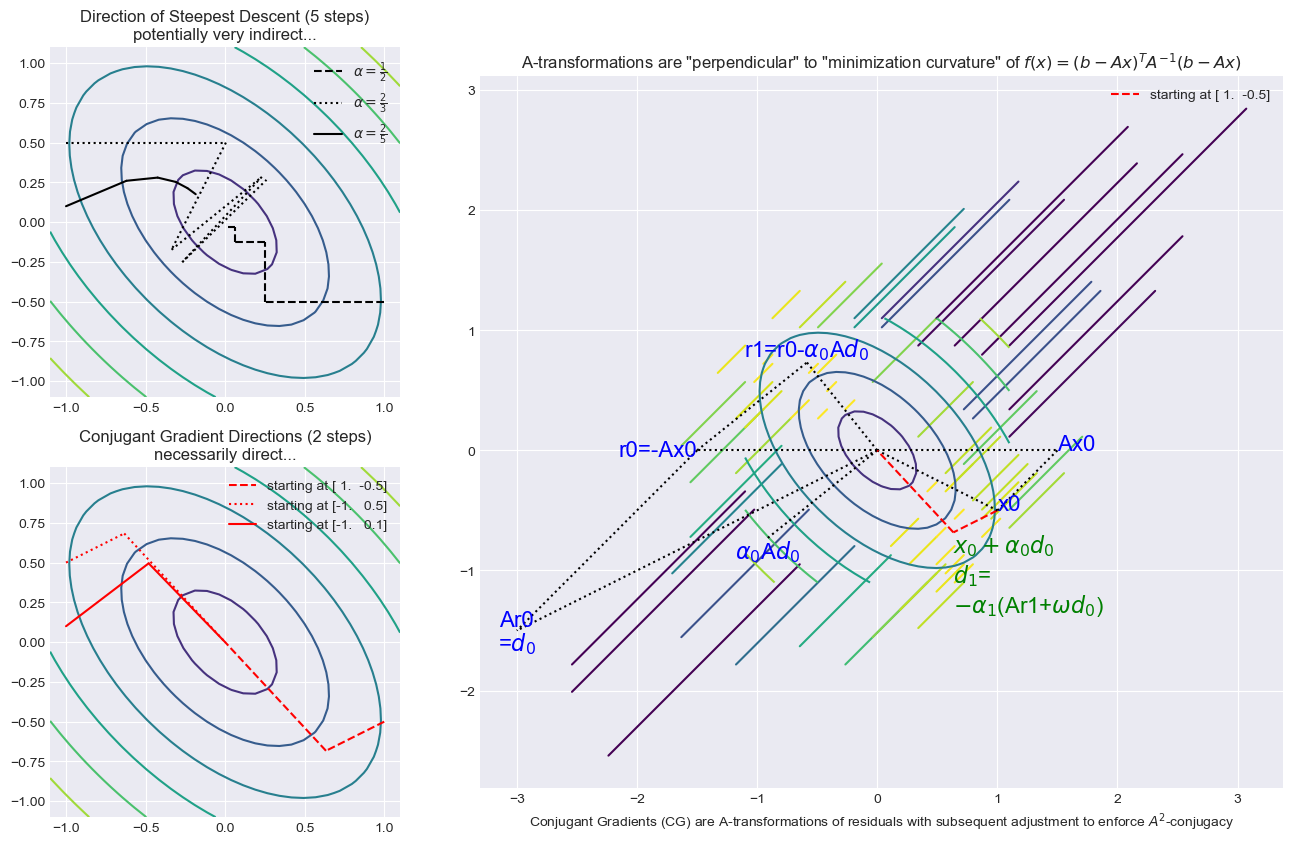

In [25]:
def plot_2D_gradient_descent(current, gradient, stepsize, 
                             ax, label=None, style='k'):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current` 
    in the negative 2D direction of `gradient` 
    with length of `stepsize` times `gradient`
  """

  next = current - stepsize*gradient

  ax.plot([current[0],next[0]], [current[1],next[1]], style, label=label)
  return next
                   

def plot_2D_conjugant_gradient(
  A, current_proposal, residual, Ar, Ar_L2sq, conjugant_gradient, 
  ax, label=None, style='k', verbose=None):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current_proposal` 
    in the direction of the conjugate gradient 
    with length of `correct_stepsize` times the conjugate gradient
    
    A                  : system of linear equations Ax=b being solved for x
    current_proposal   : a current choice for x in Ax=b
    residual           : b - Ax where x is current_proposal
    Ar                 : Ar where r is residual
    Ar_L2sq            : squared L2 norm of Ar 
    conjugant_gradient : direction which was moved resulting in current_proposal
    verbose            : provides verbose explanatory illustrative plotting 

    returns: iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, new_conjugant_gradient
  """

  # b = 0 # ignored for simplicity
  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # residual = 0 - A.dot(current)             # given as function argument
  # Ar = A.dot(residual)                      # given as function argument
  # Ar_L2sq = Ar.dot(Ar) # L2-norm squared    # given as function argument

  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # direction of change in the residual 
  Aconjugant_gradient = A.dot(conjugant_gradient) 
  Aconjugant_gradient_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V1 = Ar_L2sq/Aconjugant_gradient_L2sq

  # x_new = x_old + delta
  iterated_proposal = current_proposal + correct_stepsize_V1*conjugant_gradient

  ax.plot([current_proposal[0],iterated_proposal[0]], 
          [current_proposal[1],iterated_proposal[1]], style, label=label)

  old_residual = residual[:] 
  # new_residual = b - A.dot(iterated_proposal) 
  # new_residual = b - A.dot(current_proposal + correct_stepsize*conjugant_gradient) 
  # new_residual = b - A.dot(current_proposal) - A.dot(correct_stepsize*conjugant_gradient) 
  # new_residual = old_residual - correct_stepsize*Aconjugant_gradient
  # new_residual = b - A(x_old+epsilon*delta) = (b - A(x_old)) - epsilon*A(delta)
  new_residual = residual - correct_stepsize_V1*Aconjugant_gradient
  new_Ar = A.dot(new_residual)
  new_Ar_L2sq = new_Ar.dot(new_Ar)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V2 = new_Ar_L2sq/Ar_L2sq

  # adjust Ar so result is A-conjugate with previous conjugant_gradients  
  old_conjugant_gradient = conjugant_gradient
  conjugant_gradient = new_Ar + correct_stepsize_V2*conjugant_gradient

  # will be returned from function below after verbose plotting just next
  output = \
  iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, conjugant_gradient

  if not verbose is None:

    ax.plot([0, current_proposal[0]], [0, current_proposal[1]], 'k:')
    ax.text(current_proposal[0], current_proposal[1], 
            'x'+verbose, fontsize=16, c='blue')

    ax.plot([0, A.dot(current_proposal)[0]], [0, A.dot(current_proposal)[1]], 'k:')
    ax.text(A.dot(current_proposal)[0], A.dot(current_proposal)[1], 
            'Ax'+verbose, fontsize=16, c='blue')

    ax.plot([current_proposal[0], A.dot(current_proposal)[0]], 
            [current_proposal[1], A.dot(current_proposal)[1]], 'k:')

    ax.plot([0,old_residual[0]], [0,old_residual[1]], 'k:')
    ax.text(old_residual[0], old_residual[1], 'r'+verbose+'=-Ax'+verbose, 
            fontsize=16, c='blue',
            horizontalalignment='right', verticalalignment='center')
    
    ax.plot([old_residual[0], A.dot(old_residual)[0]], 
            [old_residual[1], A.dot(old_residual)[1]], 'k:')
    ax.text(A.dot(old_residual)[0], A.dot(old_residual)[1], 
            'Ar'+verbose, fontsize=16, c='blue', verticalalignment='bottom', 
            horizontalalignment='center')
    ax.plot([0,old_conjugant_gradient[0]], [0,old_conjugant_gradient[1]], 'k:')
    ax.text(old_conjugant_gradient[0], old_conjugant_gradient[1], 
            '=$d_0$', fontsize=16, c='blue', verticalalignment='top', 
             horizontalalignment='center')

    ax.plot([0, correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(correct_stepsize_V1*Aconjugant_gradient[0], 
            correct_stepsize_V1*Aconjugant_gradient[1], 
            '$\\alpha_0$A$d_0$', fontsize=16, c='blue', 
            verticalalignment='top', horizontalalignment='center')
    ax.plot([old_residual[0], 
             old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [old_residual[1], 
             old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.plot([0, old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0], 
            old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1], 
            'r'+str(int(verbose)+1)+'=r'+verbose+'-$\\alpha_0$A$d_0$', 
            fontsize=16, c='blue', 
            horizontalalignment='center', verticalalignment='bottom')

    Aconjugant_gradient = A.dot(conjugant_gradient)
    ACG_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
    tmp = -new_Ar_L2sq/ACG_L2sq*(conjugant_gradient)
    ax.text(tmp[0], tmp[1], 
            '$x_0+\\alpha_0 d_0$\n$d_1$=\n$-\\alpha_1$(Ar'+str(int(verbose)+1)+'+$\\omega d_0$)', 
            fontsize=16, c='green', 
            horizontalalignment='left', verticalalignment='top')
    
  return output


# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
n = 30
x1,x2 = np.meshgrid(np.linspace(-1.1,1.1,n),np.linspace(-1.1,1.1,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
# for the min_x ||(Ax-b)^TA(Ax-b)||_2 problem (with b=0) and
A = np.diag([1,1])+1.
#y = (X.dot(A).dot(np.linalg.inv(A))*X.dot(A)).sum(axis=1).reshape(n,n)
y = (X.dot(A)*X).sum(axis=1).reshape(n,n) # same as above

plt.style.use('seaborn-darkgrid') # whitegrid
plt.set_cmap("viridis")
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(231)
# https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
ax.set_aspect('equal')
ax.contour(x1, x2, np.sqrt(y))


x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1, .1])
epsilons = 0.5, 0.67, 0.2
labels = "$\\alpha=\\frac{1}{2}$", "$\\alpha=\\frac{2}{3}$", "$\\alpha=\\frac{2}{5}$"
styles = 'k--', 'k:', 'k'
for x0, epsilon, label, style in zip(x0s, epsilons, labels, styles):
  for label in [label]+4*[None]:
    x0 = plot_2D_gradient_descent(current=x0, gradient=A.dot(x0), stepsize=epsilon, 
                                  ax=ax, label=label, style=style)

ax.legend()
ax.set_title('Direction of Steepest Descent (5 steps)\npotentially very indirect...')


ax = fig.add_subplot(234)
ax.contour(x1, x2, np.sqrt(y))
ax.set_aspect('equal')


# initializing conjugant_gradient=0 and CG_L2sq=1 to disappear first time 
initial_proposal = np.array([1, -0.5])

x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1.0, 0.1])
styles = 'r--', 'r:', 'r'
for initial_proposal, style in zip(x0s, styles):
  r = -A.dot(initial_proposal)
  Ar = A.dot(r)
  Ar_L2sq = Ar.dot(Ar)
  updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient= \
  plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient=Ar, ax=ax, style=style,
                             label="starting at "+str(initial_proposal))
  plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient, ax=ax, style=style)

ax.legend()
ax.set_title('Conjugant Gradient Directions (2 steps)\nnecessarily direct...')


ax = fig.add_subplot(2,3,(2,6))
cmap = matplotlib.cm.get_cmap('viridis')
ax.set_aspect('equal')
for a,b in zip(X,X.dot(A)): 
  if stats.bernoulli(.1*np.abs(a[0]-a[1])).rvs(1)[0]:
    plt.plot([a[0],b[0]],[a[1],b[1]], color=cmap(1-(a-b).dot(a-b)/3))
ax.contour(x1, x2, np.sqrt(y))

initial_proposal = np.array([1, -0.5])
style = 'r--'
r = -A.dot(initial_proposal)
Ar = A.dot(r)
Ar_L2sq = Ar.dot(Ar)
updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient = \
plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                           conjugant_gradient=Ar, ax=ax, style=style,
                           label="starting at "+str(initial_proposal), 
                           verbose="0")#"0"
plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq,  
                           conjugant_gradient, ax=ax, style=style,
                           verbose=None)

ax.legend()
ax.set_title('A-transformations are "perpendicular" to "minimization curvature" of $f(x) = (b-Ax)^TA^{-1}(b-Ax)$')
_ = ax.set_xlabel('Conjugant Gradients (CG) are A-transformations of residuals with subsequent adjustment to enforce $A^2$-conjugacy')